# Torsion Spring Validation
Name: (Double Click to Edit)

Date: 10/09/2020

**ALL PROBLEMS IN THIS HOMEWORK MUST BE DONE IN COLLABORATORY**. For the first problem, even if you work it out by hand, we would like you to write them up on your Colaboratory notebook. You can choose to make use of sympy to help with this, or you can directly write your answers in LaTeX within a text cell. You *must* (as always) show your work. 

## Imports and Helper Functions
Here you will find all the necessary libraries that we need to import to be able to complete the homework.

In [2]:
import numpy as np
import sympy as sym
from sympy.abc import t
%matplotlib inline
import matplotlib.pyplot as plt
import math

#######################
# Custom latex printing
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

####################
# Simulation helpers
def integrate(f,x0,dt):
    """
    This function takes in an initial condition x0 and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a vector x at the future time step.
    """
    k1=dt*f(x0)
    k2=dt*f(x0+k1/2.)
    k3=dt*f(x0+k2/2.)
    k4=dt*f(x0+k3)
    xnew=x0+(1/6.)*(k1+2.*k2+2.*k3+k4)
    return xnew

def simulate(f,x0,tspan,dt):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. Additionally, this includes a flag (default false)
    that allows one to supply an Euler intergation scheme instead of 
    the given scheme. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj   

## Introduction

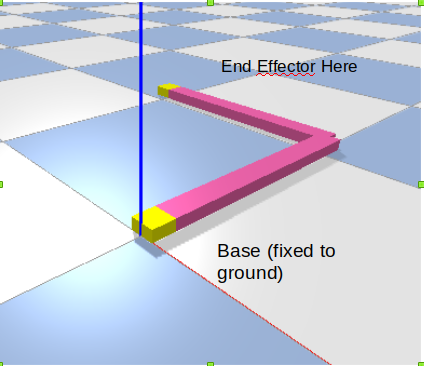



In this project I am going to simulate a torsion spring, located in the middle of a robot arm. at the end of the arm, there're 2 1kg masses (parent link $m_p$ ,child link $m_c$), each mass is $0.1m\times0.1m\times0.1m$, each arm is $1m\times0.1m\times0.1m$. Initially, the two masses lie on the x axis. 

Use this file to see the **proof of a torsional joint working**


In [ ]:
#Procedure: part A: 1. get gs (3 x 3 for 2D),  2.get g^-1*g_dot 3. get twist by unhatting g^-1*g_dot 4. KE = 1/2*V^T*G* V, L = KE - V

#Part B: 5. get lagrangian eqns, (differentiate) with constraints and torques on the right
      # 8. then solve for the 4 variables: x_p, y_p, theta_p, theta_c
      # 7. get state vec x_vec
#Part C: a. represent COM of each rectangle in the world frame, then plot the x,y coordinates in two plots.  

# Part A　L = KE-V
part A: 1. get gs (3 x 3 for 2D),  2.get g^-1*g_dot 3. get twist by unhatting g^-1*g_dot 4. KE = 1/2*V^T*G* V, L = KE - V


In [59]:
##PartA
def to_g(theta,p):
  #Returns transformation g for 2D rotation and translation
  c = sym.cos(theta)
  s = sym.sin(theta)
  g = sym.Matrix([[c,-s,p[0]],[s, c, p[1]],[0,0,1]])
  return g

#1
#substitute 
l_m = 0.1
l_arm = 1.0
m = 1.0
J = 0.0016666 #inertia
k = 1.0 #torsion spring constant

xp = 0.05
yp = 0.0
theta_p = 0.0
theta_c= sym.Function( r'\theta_c' )(t)

gwp = to_g(theta_p, [xp, yp])
gp_joint = to_g(theta_c, [l_arm + 0.5*l_m, 0.0])
gjoint_c = to_g(0.0, [l_arm + 0.5*l_m, 0.0, 0.0])
gwc = gwp*gp_joint * gjoint_c

#g^-1 * g_dot
Rp = sym.Matrix([[gwp[0,0], gwp[0,1]], [gwp[1,0], gwp[1,1]]])
pp = sym.Matrix([gwp[0,2], gwp[1,2]])
Rp_inv = Rp.T
pp_inv = -Rp_inv*pp
gp_inv = sym.Matrix([[Rp_inv[0,0], Rp_inv[0,1], pp_inv[0]], [Rp_inv[1,0], Rp_inv[1,1], pp_inv[1]], [0.0, 0.0, 1.0]])
Rp_dot = Rp.diff(t)
pp_dot = pp.diff(t)
gp_dot = sym.Matrix([[Rp_dot[0,0],Rp_dot[0,1], pp_dot[0]],[Rp_dot[1,0],Rp_dot[1,1], pp_dot[1]],[0.0,0.0, 0.0]])
ggdp = sym.simplify(gp_inv*gp_dot)

Rc = sym.Matrix([[gwc[0,0], gwc[0,1]], [gwc[1,0], gwc[1,1]]])
pc = sym.Matrix([gwc[0,2], gwc[1,2]])
Rc_inv = Rc.T
pc_inv = -Rc_inv*pc
gc_inv = sym.Matrix([[Rc_inv[0,0], Rc_inv[0,1], pc_inv[0]], [Rc_inv[1,0], Rc_inv[1,1], pc_inv[1]], [0.0, 0.0, 1.0]])
Rc_dot = Rc.diff(t)
pc_dot = pc.diff(t)
gc_dot = sym.Matrix([[Rc_dot[0,0],Rc_dot[0,1], pc_dot[0]],[Rc_dot[1,0],Rc_dot[1,1], pc_dot[1]],[0.0,0.0, 0.0]])
ggdc = sym.simplify(gc_inv*gc_dot)

#unhat for body velocity
vb_p = sym.Matrix([ggdp[0, 2], ggdp[1, 2], ggdp[1, 0]])
vb_c = sym.Matrix([ggdc[0, 2], ggdc[1, 2], ggdc[1, 0]])

G = sym.Matrix([[m, 0.0, 0.0],[0.0, m, 0.0],[0.0, 0.0, J]]) #all Gs are the same

# kinetic and potential energies
KEp = 1.0/2.0*vb_p.T*G*vb_p 
KEc = 1.0/2.0*vb_c.T*G*vb_c 
Vp = sym.Matrix([0.0])      #gravity does not affect the x-y plane
Vc = sym.Matrix([0.5 * k * theta_c**2])
KEp = sym.simplify(KEp)
KEc = sym.simplify(KEc)
Lp = KEp - Vp
Lc = KEc - Vc


In [33]:
display('vb_c', sym.simplify(vb_c))
display('ggdc', sym.simplify(ggdc))
display('KEc', KEc)

'vb_c'

⎡         0          ⎤
⎢                    ⎥
⎢     d              ⎥
⎢1.05⋅──(\theta_c(t))⎥
⎢     dt             ⎥
⎢                    ⎥
⎢  d                 ⎥
⎢  ──(\theta_c(t))   ⎥
⎣  dt                ⎦

'ggdc'

⎡                  d                                    ⎤
⎢       0         -──(\theta_c(t))           0          ⎥
⎢                  dt                                   ⎥
⎢                                                       ⎥
⎢d                                       d              ⎥
⎢──(\theta_c(t))         0          1.05⋅──(\theta_c(t))⎥
⎢dt                                      dt             ⎥
⎢                                                       ⎥
⎣       0                0                   0          ⎦

'KEc'

⎡                           2⎤
⎢          ⎛d              ⎞ ⎥
⎢0.5520833⋅⎜──(\theta_c(t))⎟ ⎥
⎣          ⎝dt             ⎠ ⎦

0.55125

# Part B Solve for state vector Xvec

In [60]:
#PartB: 5. get lagrangian eqns, (differentiate) with torques on the right
      # 6. then solve for the 4 variables: x_p, y_p, theta_p, theta_c
      #solve for state vector

L = Lp+Lc

#define variables in the system
q=sym.Matrix([theta_c]) 
qdot = q.diff(t)
qddot = qdot.diff(t)
dLdq = sym.Matrix([L]).jacobian(q).T
ddLdqdot_dt = sym.Matrix([L]).jacobian(qdot).T.diff(t)
dLdqdot = sym.Matrix([L]).jacobian(qdot).T  

#Test
# qdot_r = sym.Matrix(qdot[0:2])
# qdot_t = sym.Matrix(qdot[3:5])

# f_t = -1.0*miu*m*g*(1.0/qdot_t.norm())*qdot_t
# f_r = -1.0*miu*m*g*(1.0/qdot_r.norm())*qdot_r
# rhs_f = sym.Matrix([f_r[0], f_r[1], 0.0, f_t[0], f_t[1], 0.0])
rhs_f = sym.Matrix([0.0])
RHS = rhs_f
# RHS = RHS.row_insert(5, rhs_phi_ddot)
LHS = ddLdqdot_dt - dLdq
# LHS = LHS.row_insert(5, phi_ddot)

# Define symbols for first and second order Derivatives 
qdot_4d, qddot_4d = sym.symbols('qdot_4d, qddot_4d')



In [47]:
display('L', L)
display('dLdq',dLdq)
display('dLdqdot', dLdqdot)
display('dLdqdot_dt', ddLdqdot_dt)
display('LHS', LHS)

'L'

⎡                                                 2⎤
⎢               2                ⎛d              ⎞ ⎥
⎢- 0.05⋅\theta_c (t) + 0.5520833⋅⎜──(\theta_c(t))⎟ ⎥
⎣                                ⎝dt             ⎠ ⎦

'dLdq'

[-0.1⋅\theta_c(t)]

'dLdqdot'

⎡          d              ⎤
⎢1.1041666⋅──(\theta_c(t))⎥
⎣          dt             ⎦

'dLdqdot_dt'

⎡            2             ⎤
⎢           d              ⎥
⎢1.1041666⋅───(\theta_c(t))⎥
⎢            2             ⎥
⎣          dt              ⎦

'LHS'

⎡                              2             ⎤
⎢                             d              ⎥
⎢0.1⋅\theta_c(t) + 1.1041666⋅───(\theta_c(t))⎥
⎢                              2             ⎥
⎣                            dt              ⎦

[0.0]

In [61]:
# def update_Euler_EQs(x0):
#   '''
#   Input: unnormalized x0: [xr,yr,theta_r, xt, yt, theta_t,  xr_dot,yr_dot,theta_r_dot, xt_dot, yt_dot, theta_t_dot]
#   Output: new Euler Lagrange Equations with friction adjusted according to x0.  
#   '''
#   f_r2 = np.array([x0[5], x0[6]])
#   f_r2 = -1.0 * miu*m*g*(1.0/np.linalg.norm(f_r2))*f_r2
#   f_t2 = np.array([x0[8], x0[9]])
#   f_t2 = -1.0 * miu*m*g*(1.0/np.linalg.norm(f_t2))*f_t2

#   rhs_f2 = sym.Matrix([f_r2[0], f_r2[1], 0.0, f_t2[0], f_t2[1], 0.0])
#   RHS2 = rhs_f2 
#   LHS2 = LHS
#   EulerLagrangeEQs2= sym.Eq(LHS2, RHS2)
#   EulerLagrangeEQs2 = EulerLagrangeEQs2.subs({ qdot[0]:qdot_1d, qdot[1]:qdot_2d, qdot[2]: qdot_3d, qdot[3]: qdot_4d, qdot[4]: qdot_5d, qdot[5]: qdot_6d, qddot[0]:qddot_1d,qddot[1]:qddot_2d, qddot[2]:qddot_3d, qddot[3]:qddot_4d, qddot[4]:qddot_5d, qddot[5]:qddot_6d })
#   return EulerLagrangeEQs2

def dynamics(x0, EulerLagrangeEQs):
  """ 
  Input: x=sym.Matrix([xp, yp, theta_p, theta_c, xp_dot, yp_dot, theta_p_dot, theta_c_dot]), Euler_lagrange Equation
  Output: xdot_vec is the derivative of x. 
  """

  EulerLagrangeEQs = EulerLagrangeEQs.subs({q[0]: x0[0], qdot_4d: x0[1]})
  EulerSols = sym.solve(EulerLagrangeEQs,[qddot_4d])
  theta_c_ddot_sol = (EulerSols[qddot_4d])
  x_dot_3 = x0[1]
  x_dot_7 = float(theta_c_ddot_sol)
  # xdot = np.array([x_dot_0,x_dot_1,x_dot_2,x_dot_3,x_dot_4, x_dot_5, x_dot_6, x_dot_7])
  xdot = np.array([x_dot_3, x_dot_7])
  display(x_dot_7)
  return xdot

####################
# Simulation helpers
def integrate_final(f,x0,dt,EulerLagrangeEQs, time):
    """
    This function takes in an initial condition x0 and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a vector x at the future time step.
    """
    k1=dt*f(x0, EulerLagrangeEQs)
    k2=dt*f(x0+k1/2. ,EulerLagrangeEQs)
    k3=dt*f(x0+k2/2. ,EulerLagrangeEQs)
    k4=dt*f(x0+k3 , EulerLagrangeEQs)
    xnew=x0+(1/6.)*(k1+2.*k2+2.*k3+k4)
    return xnew

def simulate_final(f,x0, dt, time_span, EulerLagrangeEQs):
    """
    Inputs: 
        0. dynamical system dynamics f(x) that outputs a vector of the
    same dimension as x0.
        1. initial condition x0, 
        2. a timestep dt,
        3. a time span tspan consisting of a list [min_time, max_time],
        4. Euler Lagrange Equation for solving the dynamics
    Outputs:
        1. a full trajectory simulated over the time span with step size dt.
    """
    x = np.copy(x0)
    xtraj = np.array([np.copy(x)]).T
    time = 0 
    tvec = np.arange(start = min(tspan), stop = max(tspan),step=dt)
    for time in tvec:
      x_new = integrate_final(f,x,dt,EulerLagrangeEQs, time)
      xtraj = np.hstack((xtraj, np.array([x_new]).T ))
      x = np.copy(x_new)
    xtraj = np.delete(xtraj, -1, axis=1)
    return xtraj   
    
############################################
# x=sym.Matrix([theta_c, theta_c_dot])
x0 = np.array([math.pi/2.0, 0.0])
EulerLagrangeEQs= sym.Eq(LHS, RHS)
EulerLagrangeEQs = EulerLagrangeEQs.subs({ qdot[0]: qdot_4d, 
                                           qddot[0]:qddot_4d})

T = 6.0
tspan = [0,T]
dt = 0.01
# q1, q1dot, q2, q2dot, q3, q3dot
#N = int((max(tspan)-min(tspan))/dt)
#tvec = np.linspace(min(tspan),max(tspan),N)

xvec = simulate_final( dynamics, x0 ,dt, tspan, EulerLagrangeEQs)
N = xvec.shape[1]


-1.422608079971718

-1.422608079971718

-1.422575869975509

-1.4225436599793002

-1.422543660465486

-1.4224792414454486

-1.4224470329077967

-1.4223504082671854

-1.4223504077809908

-1.4222215755750445

-1.4221893714129281

-1.4220283408787677

-1.4220283394202378

-1.4218351056961152

-1.4218029088261046

-1.4215774869821909

-1.4215774845514435

-1.421319866809438

-1.4212876801474614

-1.4209978874091918

-1.4209978840064623

-1.4206759055777995

-1.4206437320388607

-1.4202895946514231

-1.4202895902770107

-1.419903280321801

-1.4198711228196994

-1.4194526728556722

-1.4194526675099755

-1.4190020610145064

-1.4189699224616013

-1.4184871978180558

-1.4184871915015542

-1.4179723292751747

-1.417940212582105

-1.4173932569771717

-1.4173932496904453

-1.4168141783618342

-1.416782086437264

-1.4161709494061765

-1.4161709411498773

-1.4155277131628325

-1.4154956489131711

-1.4148203858037727

-1.4148203765786613

-1.414113050187363

-1.4140810165165203

-1.413341688484256

-1.4133416782911654

-1.412570317554869

-1.4125383173640012

-1.4117349913663844

-1.4117349802062207

-1.4108996549835051

-1.4108676911707074

-1.4100004399612431

-1.4100004278350295

-1.4091012137774228

-1.4090692892375027

-1.408138191359112

-1.4081381782679534

-1.4071751568130932

-1.4071432744373178

-1.4061484142152099

-1.4061484001602838

-1.405121658524556

-1.4050898212003695

-1.4040312887344175

-1.4040312737169915

-1.402940904887623

-1.4029091154983768

-1.4017870066549558

-1.401786990676398

-1.4006330934030427

-1.4006013548277498

-1.3994157712310533

-1.3994157542928123

-1.398198433078577

-1.3981667481916586

-1.3969177972144964

-1.396917779318103

-1.3956371444101279

-1.3956055160811331

-1.3942933108351947

-1.3942932919822606

-1.3929494593617122

-1.3929178904550816

-1.3915425497807035

-1.3915425299729407

-1.3901356213444964

-1.3901041147192734

-1.3886657631746786

-1.3886657424138893

-1.3871958851947341

-1.3871644437043287

-1.3856632115543432

-1.3856631898424114

-1.3841305171506908

-1.3840991436426169

-1.3825351668468688

-1.3825351441857505

-1.380939794828525

-1.3809084921441293

-1.3792819123447404

-1.3792818887364915

-1.3776240071971475

-1.3775927781713648

-1.3759037426801264

-1.375903718126884

-1.3741834545520577

-1.3741523020131654

-1.3724009637981804

-1.3724009383021638

-1.3706184484881538

-1.3705873752574838

-1.3687738929293278

-1.3687738664928464

-1.3669293118714694

-1.366898320763189

-1.365022858560538

-1.3650228311860004

-1.3631163788100094

-1.3630854726308421

-1.361148200405609

-1.3611481720954701

-1.359179994623429

-1.359149176172391

-1.3571502693743227

-1.3571502401311721

-1.3551205158117625

-1.3550897878799448

-1.3530294275407624

-1.353029397367236

-1.3509383100231795

-1.3509076753934688

-1.348786048110448

-1.348786017009272

-1.3466337560206494

-1.3466032174674727

-1.344420515386555

-1.3444204833605544

-1.3422072436476524

-1.3421768039367519

-1.339933224735135

-1.3399331917872086

-1.3376591737928678

-1.3376288356810375

-1.335324582549273

-1.3353245486824

-1.3329899583538933

-1.3329597245886988

-1.3305950062123053

-1.330594971429565

-1.3282000201998956

-1.3281698935194743

-1.3257449240600196

-1.3257448883645548

-1.323289793133346

-1.323259776266136

-1.320774775341846

-1.320774738736881

-1.3182597218507153

-1.318229817515201

-1.3156850101810904

-1.3156849726699575

-1.3131102619022348

-1.3130804728067214

-1.3104760895341698

-1.3104760511202567

-1.307841879650598

-1.3078122084929302

-1.3051484851488535

-1.3051484458356375

-1.3024550522287217

-1.3024255016960846

-1.2997026795215414

-1.299702639312591

-1.2969502674965807

-1.2969208402652372

-1.294139165853595

-1.2941391247525418

-1.2913280239969855

-1.2912987227320134

-1.2884584480066141

-1.2884584060171898

-1.285588830910426

-1.28555965826551

-1.282661040456866

-1.2826609975828647

-1.2797332080090087

-1.2797041666261777

-1.2767474682486502

-1.2767474244939576

-1.2737616856093184

-1.2737327781187187

-1.2707182669467543

-1.2707182223153373

-1.267674804524426

-1.2676460335440685

-1.2645739825879627

-1.2645739370838605

-1.261473116014911

-1.2614444841504533

-1.2583151716316

-1.2583151252589329

-1.2551571817389242

-1.2551286915834259

-1.2519424009091382

-1.2519423536721

-1.2487275737013146

-1.2486992278349933

-1.245456247572839

-1.2454561994757132

-1.2421848742018642

-1.2421566751918687

-1.2388572990435138

-1.2388572500906656

-1.2355296757824952

-1.2355016261826883

-1.2321461529573254

-1.2321461031531746

-1.2287625811736471

-1.2287346835243431

-1.2253234171116116

-1.2253233664606773

-1.2218842032396742

-1.221856460067439

-1.2183897094099114

-1.2183896579167672

-1.2148951649233548

-1.2148675787407626

-1.2113456578059507

-1.2113456054752698

-1.2077960991894612

-1.2077686724948482

-1.2041919002467925

-1.2041918470833206

-1.2005876489674203

-1.2005603842447055

-1.1969290846150753

-1.1969290306236215

-1.1932704670931362

-1.1932433668115572

-1.1895578686702986

-1.1895578138557623

-1.1858452162498032

-1.1858182828637092

-1.1820789199892934

-1.182078864356629

-1.1783125689079348

-1.1782858048565679

-1.174492915905743

-1.1744928594599764

-1.1706732072644654

-1.170646614971699

-1.1668005434488147

-1.1668004861950725

-1.162927823180904

-1.1629014050550976

-1.1590024992809962

-1.1590024412244675

-1.1550771181207709

-1.15505087655448

-1.15109948963497

-1.1510994307809075

-1.1471218030859744

-1.1470957404557791

-1.1430922302496471

-1.1430921706033763

-1.139062598552483

-1.1390367172187603

-1.1349814463053403

-1.134981385872268

-1.1309002344050707

-1.1308745367117607

-1.1267678723581296

-1.126767811143726

-1.1226354498711697

-1.1226099381456023

-1.11845225227328

-1.1184521902830968

-1.114268993453959

-1.1142436700066094

-1.1100353391579223

-1.1100352763975654

-1.105801622864584

-1.105776489988884

-1.10151789529283

-1.1015178317679868

-1.0972341049535097

-1.097209164925619

-1.0929006920633535

-1.0929006277797753

-1.0885672156410635

-1.0885424707196902

-1.0841845098896126

-1.0841844448531226

-1.0798017398472024

-1.0797771922733852

-1.0753701381557728

-1.075370072372258

-1.0709384714203907

-1.0709141234172814

-1.0664583751385888

-1.066458308614008

-1.0619782130657276

-1.061954066838419

-1.0574500279350778

-1.0574499606754633

-1.052921776272231

-1.0528978340075221

-1.0483459123894527

-1.0483458444008902

-1.0437699812393528

-1.0437462451055937

-1.0391468530192092

-1.0391467843078481

-1.0345236568027054

-1.0345001289495626

-1.0298536829404639

-1.0298536135125351

-1.025183640358982

-1.0251603229172754

-1.0204672437925038

-1.0204671736543018

-1.015750777790145

-1.015727672871612

-1.010988385661575

-1.0109883148194394

-1.0062259233867696

-1.0062030330839205

-1.0014179670038652

-1.001417895464226

-0.9966099397707284

-0.9965872661566288

-0.991756854567798

-0.991756782337122

-0.9869036978170324

-0.9868812429451317

-0.9820059233154761

-0.982005850400311

-0.9771080765749752

-0.9770858424789067

-0.9721660563435083

-0.9721659827504563

-0.9672239631885261

-0.9672019518819261

-0.9622381448029853

-0.9622380705387031

-0.9572522528159609

-0.9572304662922968

-0.9522230878187766

-0.9522230128900023

-0.947193848548824

-0.9471722887811947

-0.9421217924081384

-0.9421217168216462

-0.9370496613301018

-0.937028330271075

-0.9319351733985071

-0.9319350971611531

-0.9268206098717712

-0.9267995094532021

-0.9216641533447036

-0.9216640764633797

-0.9165076205715514

-0.9164867527044107

-0.9113096624453412

-0.9113095849270301

-0.9061116274290311

-0.9060909940032238

-0.9008726384586356

-0.9008725603103427

-0.8956335719610655

-0.8956131748452607

-0.8903540266174008

-0.8903539478462081

-0.8850744031165152

-0.8850542441579885

-0.8797547795435073

-0.879754700156547

-0.8744350771903071

-0.8744151582147612

-0.8690758571615769

-0.86907577716604

-0.8637165577368198

-0.8636968805482235

-0.8583182266120566

-0.8583181460151883

-0.852919815482622

-0.8529003818630486

-0.8474828621636273

-0.8474827809727254

-0.8420458282385602

-0.8420266399480214

-0.8365707451249658

-0.8365706633473844

-0.8310955808112009

-0.8310766395874907

-0.825582863755878

-0.8255827813990235

-0.8200700649136399

-0.8200513724721776

-0.8145202131777922

-0.8145201302491218

-0.8089702790756902

-0.8089518371093638

-0.8033837952836357

-0.8033837117906609

-0.7977972285534484

-0.7977790387324603

-0.7921746186471009

-0.7921745345973841

-0.7865519252382539

-0.7865339892099734

-0.7808936984313029

-0.7808936138324551

-0.7752353875650468

-0.7752177069538546

-0.7695420562968369

-0.7695419711565202

-0.7638486404201313

-0.7638312168272795

-0.7581207203092577

-0.7581206346351819

-0.7523927150483577

-0.7523755500518201

-0.7466307248459644

-0.7466306386458901

-0.7408686489597276

-0.7408517441140585

-0.7350731105025301

-0.7350730237842632

-0.729277485835432

-0.7292608426716249

-0.7234489239984555

-0.7234488367698497

-0.7176202754333277

-0.7176038954586762

-0.7117592180823719

-0.7117591303513274

-0.7058980734928687

-0.705881958190831

-0.700005051436699

-0.7000049632111612

-0.6941119416394881

-0.6940960924695531

-0.6881874885817684

-0.6881873998697271

-0.6822629472884582

-0.6822473656860106

-0.6763075997794092

-0.6763075105888985

-0.6703521635482137

-0.6703368509244076

-0.6643664609360245

-0.6643663712751228

-0.6583806691231667

-0.6583656268647956

-0.6523651535051486

-0.6523650633819752

-0.6463495482160174

-0.6463347776853883

-0.6403047643895051

-0.6403046738122227

-0.6342598904295574

-0.6342453929643688

-0.6281863858425721

-0.6281862948193833

-0.6221127906679925

-0.6220985675812128

-0.6160111153696625

-0.6160110239088105

-0.609909349037781

-0.6098954016175294

-0.6037800556285238

-0.6037799637382928

-0.5976506707480049

-0.5976370002574339

-0.5914943143294825

-0.5914942220181937

-0.5853378660102715

-0.5853244736874544

-0.5791550041351178

-0.5791549114111322

-0.5729720499381705

-0.5729589369959887

-0.5667632425594951

-0.566763149431209

-0.560554342446283

-0.5605415100723133

-0.5543201518669583

-0.5543200583428081

-0.548085868148754

-0.5480733175051654

-0.5418268589704923

-0.5418267650589467

-0.5355677562574425

-0.5355554884808886

-0.5292844953296623

-0.5292844010392255

-0.5230011404796541

-0.5229891566811711

-0.5166941968481404

-0.5166941021873538

-0.510387158915468

-0.5103754601803723

-0.5040571037708395

-0.504057008748275

-0.49772695395465955

-0.49771554134245233

-0.49137436058063794

-0.49137426520490113

-0.4850216721732472

-0.48501054671751437

-0.4786471158947345

-0.4786470201744637

-0.47227246422964253

-0.4722616269379657

-0.46587652236062205

-0.4658764263044861

-0.459480484760451

-0.45946993661431257

-0.4530637365516979

-0.4530636401683958

-0.44664689227589205

-0.44663663423058986

-0.44020991886251676

-0.4402098221607772

-0.4337728490548863

-0.43376288203944313

-0.42731623340370106

-0.42731613639228266

-0.42085952103978785

-0.4208498459568701

-0.4143838478965113

-0.41438375058419896

-0.4079080777307935

-0.40789869545662943

-0.40141393356709304

-0.40141383596270075

-0.39491969208002486

-0.39491060346432233

-0.3884076650404024

-0.38840756715276936

-0.38189554038530055

-0.3818867462511735

-0.37536622023382615

-0.3753661220718178

-0.36883680218360165

-0.3688283033274942

-0.36229078025050476

-0.3622906818230111

-0.35574466014425177

-0.3557364573358658

-0.3491825292723616

-0.349182430588298

-0.3426202999618029

-0.3426123939440289

-0.33604265445286335

-0.336042555521165

-0.32946491024865543

-0.32945730173750504

-0.3228723458094983

-0.32287224663912584

-0.3162796824274109

-0.3162723721119512

-0.3096727961160046

-0.30967269671594033

-0.3030658106229694

-0.30305879916526185

-0.29644520079434933

-0.2964451011735946

-0.28982449155438317

-0.2898177795894234

-0.2831907578064605

-0.2831906579740367

-0.27655692442647695

-0.2765505125621351

-0.26991066754573356

-0.2699105675106827

-0.2632643108212384

-0.26325819963820857

-0.25660613272832017

-0.2566060324997025

-0.24994785458900134

-0.24994204464074443

-0.24327835828420094

-0.24327825787109392

-0.23660876173941234

-0.2366032535521089

-0.22992855124806258

-0.22992845065955897

-0.22324824033221435

-0.22324303440471574

-0.21655792064998072

-0.21655781989519063

-0.209867500367834

-0.20986259717161612

-0.20316767740592406

-0.20316757649397382

-0.19646775367779826

-0.19646315365692096

-0.18975903420808962

-0.18975893314811643

-0.1830502138149859

-0.18304591738605208

-0.1763332054150696

-0.17633310421622697

-0.1696160959437217

-0.1696121034958375

-0.16289140694187906

-0.16289130561333226

-0.15616661672972085

-0.15616292862446482

-0.1494348561498301

-0.1494347547007553

-0.14270299422990607

-0.14269961080129392

-0.135964771736286

-0.13596467017587202

-0.12922644778209286

-0.12922336933654485

-0.12248237362428731

-0.12248227196173023

-0.11573819789455594

-0.11573542471087243

-0.10898888285206688

-0.10898878109657546

-0.10223946613549985

-0.10223699846483493

-0.09548552146247043

-0.09548541962325975

-0.08873147502241908

-0.08872931308825932

-0.08197351239227849

-0.0819734104785717

-0.07521544791138883

-0.07521359190953004

-0.06845407936145334

-0.06845397738248014

-0.06169260888626535

-0.06169105898479713

-0.05492844676230969

-0.054928344727305824

-0.04816418264782887

-0.04816293898711852

-0.04139783954862862

-0.041397737466835074

-0.034631394402867555

-0.03463045709554754

-0.027863483124719222

-0.02786338100538089

-0.021095469753216228

-0.021094838884174183

-0.014326603234438897

-0.014326501086804383

-0.007557634584759202

-0.007557310211130105

-0.0007884258501838971

-0.0007883236835040953

0.005980885043592117

0.005980902892431305

0.012749822938141671

0.012749925114613954

0.019518863010938112

0.019518574333370977

0.026286917034166947

0.026287019211178004

0.033055073245434975

0.03305447806760556

0.03982163044609609

0.03982173261439225

0.04658828983533409

0.04658738821114495

0.053352737397740886

0.05335283954806919

0.06011728714000741

0.06011607915111442

0.06687901243953331

0.06687911456264253

0.07364083990094791

0.07363932565675316

0.08039923055950923

0.0803993326461506

0.0871577233527359

0.08715590299037736

0.09391216729425161

0.09391226933518003

0.10066671333395975

0.10066458701829868

0.10741659883978469

0.10741670082575853

0.1141665863980825

0.11416415432169112

0.12091130216240918

0.12091140408419074

0.12765611992424514

0.12765338230738368

0.13439505510946356

0.1343951569578241

0.14113409222799259

0.1411310493185947

0.14786663652001336

0.14786673828572788

0.15459928267191383

0.15459593474556194

0.16132482633544248

0.161324928009295

0.16805047177619484

0.16804681913609415

0.17476840570994992

0.1747685072827316

0.18148644132905487

0.1814824843060096

0.18819615712093357

0.18819625858344655

0.19490597449707953

0.19490171344945773

0.20160686447925794

0.2016069658223125

0.20830785593542042

0.2083032912491258

0.21499931323938798

0.21499941445380616

0.22169087189786488

0.22168600398630062

0.22837229050938326

0.2283723915859989

0.23505381034675926

0.23504863965078912

0.24172458516074838

0.241724686090407

0.2483954610627762

0.24838998805068546

0.25505498793811643

0.2550550887116772

0.26171461575451926

0.2617088409219741

0.2683622915687642

0.2683623921770999

0.2750100681679549

0.27500399203795334

0.2816452908719517

0.2816453913059524

0.28828061419565126

0.28827423731848256

0.2949027828680708

0.294902883118639

0.3015250519858353

0.3015183749390228

0.30813356688758925

0.30813366694564753

0.31474218205123483

0.31473520543948713

0.3213364446797947

0.32133654453627924

0.32793080737771185

0.3279235318328683

0.3345102205213099

0.3345103201671786

0.3410897335326689

0.3410821597136419

0.347653701324388

0.3476538007506159

0.3542177687732268

0.35420989736594277

0.3607656967449631

0.36076579594254526

0.3673137241541521

0.36730555587148717

0.3738450192904531

0.3738451182504062

0.3803764136355356

0.3803679492172522

0.38689048442730833

0.3868905831406701

0.39340465419020465

0.39339589440288814

0.39990091068828565

0.39990100914611526

0.4063972659108689

0.40638821154785154

0.41287511977945174

0.4128752179728331

0.4193530721169749

0.4193437239982671

0.4258119366868931

0.4258120346069325

0.4322708994612724

0.43226125843349095

0.43871018978313325

0.43871028742096435

0.44514957803608257

0.445139644972371

0.4515687109332423

0.4515688082800213

0.45798794147924776

0.4579777172791977

0.46438633560062764

0.46438643264753704

0.4707848270797659

0.4707743126693354

0.4771619029525001

0.4771619996907523

0.48353907588308864

0.48352827221451905

0.48989425596500746

0.48989435238584106

0.49624953279608713

0.4962384408478159

0.5025822415280194

0.502582337622702

0.5089150466916578

0.5089036674682326

0.5152247105495611

0.5152248063093894

0.5215344705129805

0.5215228050449633

0.5278205180598771

0.5278206134761793

0.5341066613773973

0.5340947107212761

0.5403685233151302

0.5403686183792654

0.5466304806799209

0.5466182459180109

0.5528675899007115

0.5528676846040698

0.5591047941963514

0.559092276436699

0.5653165858341603

0.5653166801681639

0.5715284721859989

0.5715156725622791

0.577714383667682

0.5777144776237879

0.5839003894939976

0.5838873091654122

0.5900598605902561

0.5900599541599556

0.5962194256532057

0.5962060658043804

0.6023518985293252

0.6023519917041432

0.6084844649856842

0.6084708268265577

0.6145893842520522

0.6145894770235515

0.6206943967037329

0.6206804814694512

0.6267712094661413

0.6267713018259192

0.6328481150104956

0.6328339239612962

0.6388962709202098

0.6388963628599018

0.6449445192001017

0.6449300536212017

0.6509634705037066

0.6509635620149867

0.6569825137573551

0.6569677749588351

0.6629717153463608

0.6629718064209404

0.6689610084569484

0.6689459977736331

0.6749199179171603

0.6749200085467909

0.6808789184622022

0.6808636372535386

0.6868069961228396

0.6868070862993148

0.6927351644233081

0.6927196140732458

0.6986318734058873

0.698631963121039

0.7045286725750888

0.704512854491949

0.710393478842038

0.7103935680877423

0.7162583748342343

0.7162422904505896

0.7220907472372656

0.7220908360054389

0.7279232088960416

0.727906859668579

0.7337226192242511

0.7337227075068545

0.7395221183306188

0.7395055057400115

0.745288041358324

0.7452881291473614

0.7510540526785605

0.7510371782293342

0.7567859662128676

0.7567860535003903

0.762517967546085

0.7625008327664802

0.7682153524741837

0.768215439252285

0.7739128246996188

0.7738954311414536

0.7795751650357944

0.7795752512966141

0.7852375921598254

0.7852199413983533

0.7908643750921881

0.7908644608279158

0.7964912442950666

0.7964733379288342

0.8020819602319967

0.8020820454348674

0.807672761914289

0.8076546015649939

0.8132269045305862

0.8132269891928836

0.8187811323593278

0.8187627196716682

0.8242981986420691

0.8242982827561248

0.8298153495966188

0.8297966862381465

0.8352948398907113

0.835294923448908

0.8407744143083072

0.8407555019692762

0.8462158323617424

0.8462159153565123

0.8516573339827586

0.851638174375971

0.8570601869915518

0.8570602694153789

0.8624631230044352

0.8624437178650884

0.8678269216572626

0.8678270035026816

0.8731908027431703

0.8731711538286976

0.8785150612656758

0.8785151425252756

0.8838394016427883

0.8838195107327002

0.8891236378415848

0.8891237185080051

0.894407955309101

0.8943878242048247

0.8996516906154353

0.8996517706813709

0.9048955065972427

0.9048751371219597

0.9100982661103406

0.9100983455685401

0.9153011056983611

0.9152804996968392

0.9204624182284358

0.9204624970717009

0.9256238102256308

0.9256029695640585

0.930743208336559

0.9307432865577532

0.9358626852996006

0.9358416118654196

0.9409397053512486

0.9409397829432895

0.9460168036328667

0.9459954993346112

0.9510509858230904

0.9510510627789411

0.9560852456140495

0.9560637123811389

0.9610761340203281

0.961076210333033

0.9660670993910883

0.96604533917369

0.9710142420118123

0.9710143176744523

0.9759614609537999

0.9759394757226401

0.9808644097492263

0.9808644847549455

0.9857674342157605

0.9857452259619336

0.9906257451485673

0.9906258194905733

0.9954841310954977

0.9954617018303035

1.0002973641709956

1.0002974378425593

1.0051106715968405

1.005088023351594

1.0098783909028584

1.009878463897305

1.0146461838886993

1.014623318714549

1.0193679576350163

1.0193680299457437

1.024089804383967

1.0240667243517056

1.0287652049414553

1.0287652765618975

1.0334406778177587

1.0334173850176414

1.0380692817570736

1.0380693526807638

1.0426979573248638

1.0426744538664003

1.0472793454548344

1.0472794156753338

1.051860804516429

1.0518370925282199

1.0563945619219872

1.0563946314329469

1.0609283895558967

1.0609044711854443

1.0654141056356712

1.065414174430797

1.069899891234185

1.0698757686476479

1.0743371597376792

1.0743372278107308

1.0787744970439967

1.0787501724260542

1.0831629161084115

1.0831629834532217

1.0875514032534763

1.087526878807093

1.0918905754400468

1.0918906420505294

1.0962298149789533

1.096205092925189

1.1005193473089931

1.1005194131791072

1.1048089462569508

1.1047840288347701

1.1090484502474174

1.109048515371204

1.1132880201153612

1.1132629095814164

1.1174771118140505

1.1174771761856046

1.1216662686437988

1.1216409672722485

1.1258045686641218

1.125804632277611

1.129942933063181

1.1299174431454457

1.1340300666185066

1.1340301294681798

1.138117263794422

1.1380915876389939

1.1421528607320217

1.1421529228121825

1.1461885205263047

1.1461626604585666

1.1501722153608975

1.1501722766659217

1.1541559722825794

1.1541299306445514

1.1580874042294071

1.1580874647537427

1.1620188974880965

1.1619926766382538

1.165897710495608

1.1658977702337763

1.1697765840342118

1.1697501863472506

1.1736024268163157

1.1736024857629093

1.177428329343253

1.1774017572098903

1.1812008554111217

1.1812009135607977

1.1849734404321504

1.184946696258907

1.1886923081256036

1.1886923654730999

1.192411233975208

1.1923843201841824

1.1960761064936578

1.196076163033776

1.1997410363659886

1.1997139553946208

1.2033515817989333

1.2033516375265472

1.2069621837782814

1.2069349380791812

1.2105180751353737

1.210518130045448

1.2140740222262927

1.2140466142669684

1.2175749374669547

1.2175749915545082

1.2210759076237951

1.2210483398864718

1.2245215296863896

1.2245215829465228

1.2279672058425422

1.2279394808238993

1.231357222673055

1.2313572751009494

1.2347472927696237

1.2347194129805774

1.238081397349956

1.2380814489408662

1.2414155543640153

1.2413875223295199

1.2446934447398064

1.2446934954890503

1.2479713867122226

1.247943204971007

1.2511927660201367

1.2511928159231316

1.254414196082928

1.2543858671872705

1.2575787725775893

1.2575788216298065

1.260743398980788

1.2607149254963155

1.2638508860611886

1.2638509342581816

1.2669584221992496

1.2669298067046675

1.2700085384347162

1.270008585772129

1.2730587028725104

1.273029947959402

1.2760511720281613

1.2760512185017008

1.2790436885264598

1.2790147967990158

1.2819782395882469

1.2819782851937107

1.2849128371287177

1.2848838112035268

1.2877892043279702

1.2877892490612195

1.2906656171377309

1.2906364596435356

1.2934835399752085

1.2934835838322043

1.2963015075508986

1.2962722211283606

1.2990607308204214

1.2990607737971789

1.3018199979517855

1.301790585253249

1.3045202717633009

1.3045203138559436

1.3072205885563284

1.3071910522455488

1.3098616683585702

1.309861709563267

1.3125027902580915

1.3124731330100459

1.3150844368607146

1.3150844771737435

1.3176661246725812

1.3176363491731864

1.3201881042678252

1.3201881436855363

1.322710124180554

1.3226802331264413

1.3251722083644444

1.3251722468832603

1.3276343319703838

1.3276043280686356

1.330036297763372

1.330036335379806

1.3324383020794144

1.3324081880473653

1.3347799319466103

1.3347799686572661

1.3371215994343788

1.3370913779992983

1.3394026813052216

1.3394027171067664

1.3416837998907503

1.3416534737896708

1.3439041271782446

1.3439041620674452

1.3461244902712235

1.3460940622506241

1.3482838618906332

1.3482838958643106

1.3504432684030563

1.3504127412186713

1.3525414887901155

1.3525415218451997

1.3546397431545747

1.3546091195710954

1.3566766222831863

1.3566766544166977

1.3587135344705137

1.3586828172613896

1.3606888878699916

1.360688919079014

1.362664273406504

1.3626334653536523

1.3645779221782746

1.364577952459964

1.3664916021624636

1.3664607060560154

1.3683433729962127

1.3683434023478522

1.370195174114975

1.3701641927530501

1.3719848993044257

1.3719849277233436

1.3737746538487128

1.3737435900371555

1.3755021713067574

1.3755021987903817

1.3772297171868177

1.3771985737389267

1.3788948704602095

1.3788948970060497

1.3805600512202234

1.3805288309565151

1.3821626895037669

1.382162715109423

1.3837653543360304

1.3837340600839856

1.3853053324862117

1.385305357149365

1.3868453362448203

1.3868139708386127

1.388322514792967

1.3883225385113713

1.3897997180069204

1.389768284287172

1.3912139631718166

1.391213985943335

1.3926282320576804

1.39259673287119

1.3939794157577037

1.393979437580271

1.3953306222316995

1.3952990604312157

1.396618622096421

1.396618642968072

1.3979066437860554

1.3978750222299696

1.3991313431672991

1.3991313630861322

1.400356063422431

1.400324384974559

1.4015173514048513

1.4015173703690638

1.402678659308233

1.4026469268375532

1.403776430719377

1.4037764487272482

1.4048742210967529

1.4048424374771253

1.40590837651656

1.40590839356646

1.4069425499461403

1.4069107180560614

1.4079129957159364

1.4079130118063252

1.4088834585374435

1.4088515812597846

1.4097901067684713

1.4097901218978912

1.4106967710915816

1.4106648513133162

1.4115395396729171

1.4115395538400002

1.4123823233852573

1.4123503639971993

1.4131611359912535

1.4131611491947138

1.4139399627658091

1.413907966662386

1.4146547488630339

1.414654761101667

1.4153695481650777

1.4153375182440222

1.4160202430186621

1.4160202542913722

1.4166709501121388

1.4166388892742545

1.4172574947916736

1.4172575050974372

1.4178440507450596

1.417811961893948

1.4183663921299106

1.4183664014677948

1.4188887438215665

1.418856629863365

1.4193468346056926

1.4193468429748464

1.4198049347286361

1.4197727985717645

1.4201987334249015

1.420198740824564

1.420592540491127

1.4205603850459976

1.4209220114349954

1.4209220178645052

1.4212514897792417

1.4212193179580237

1.4215166031320545

1.4215166085908322

1.421781722914984

1.4217495376313412

1.421982454666669

1.4219824591542074

1.4221831918776116

1.4221509960464027

1.4223195238488195

1.4223195273647202

1.4224558603079462

1.4224236568450088

1.422527780151718

1.422527782695664

1.4225997035116622

1.4225674953335121

1.4226072047145604

1.4226072062863158

1.4226147084615584

1.422582498485138

1.4225577903442288

1.4225577909436584

1.4225008737987004

1.422468664941115

1.4223795415159541

1.4223795411429943

1.4222582098325742

1.422226005010829

1.4220724743729072

1.4220724730275938

1.421886738540108

1.4218545406708554

1.4216366167247225

1.421636614407192

1.421386493563761

1.421354305562992

1.421072008045027

1.4210720047554781

1.4207575202083726

1.420725344991227

1.4203786994677976

1.4203786952065205

1.4199998754371577

1.419967715917589

1.4195567537827625

1.4195567485501555

1.4191136278664922

1.4190814869570316

1.4186062454297477

1.4186062392262817

1.4180988577596896

1.4180667383712022

1.417527260491877

1.4175272533181134

1.416955657019774

1.41692356206116

1.4163198966878097

1.4163198885443917

1.41568412918114

1.415652061559089

1.4149842633628837

1.4149842542505542

1.4142843894001593

1.41425235201888

1.413520481479208

1.4135204713987908

1.4127565644447677

1.4127245602057426

1.4119286836047114

1.4119286725571214

1.4111007926829793

1.4110688244846927

1.410209013901154

1.4102090018873963

1.4093172240703622

1.4092852948080117

1.4083616281110296

1.408361615132182

1.407406020136454

1.4073741327017317

1.4063866935435014

1.4063866796007505

1.4053673539701164

1.4053355112509198

1.4042843890592325

1.4042843741538278

1.403201410203895

1.4031696150840642

1.4020549050541828

1.402054889187483

1.400908384997255

1.4008766403563375

1.3996984434423665

1.3996984266158023

1.398488486018849

1.3984567947318094

1.397215217637583

1.3972151998526852

1.3959419324277151

1.395910297364673

1.394605452534065

1.3946054337924367

1.3932689548533799

1.3932373788793828

1.3918693844861274

1.3918693647894802

1.3904697953750187

1.390438281349762

1.389007261286775

1.389007240636875

1.3875447074995204

1.3875132582770844

1.386019342145198

1.386019320543938

1.3844939561385212

1.384462574567108

1.382905897663387

1.382905875112705

1.3813178175844207

1.3812865065061106

1.3796672098115628

1.3796671863134966

1.3780165794853332

1.3779853417358394

1.3763035719026369

1.3763035474593326

1.3745905408190937

1.3745593792274553

1.372815288565702

1.3728152631793609

1.371040011866117

1.3710089292545073

1.3692026757183926

1.3692026493913148

1.3673653141813291

1.3673343133647586

1.365466060538283

1.3654660332728594

1.3635667805650615

1.3635358643511133

1.361605781433273

1.361605753231967

1.3596447550328636

1.359613926221496

1.3576221880109396

1.3576221588763056

1.3555995927843951

1.3555688541676139

1.3535156410468403

1.3535156109815132

1.3514316601712277

1.3514010145328974

1.349286512451871

1.349286481458586

1.3471413346636731

1.3471107847792354

1.3449351852386044

1.3449351533201601

1.3427290048166192

1.3426985534528213

1.3404620534865481

1.3404620206458338

1.3381950702342926

1.3381647201489792

1.3358675223064798

1.3358674885464747

1.3335399415341218

1.3335096954759453

1.331152007803777

1.3311519731275334

1.3287640403094878

1.3287339010177177

1.3263159370407056

1.3263159014513661

1.3238677990916317

1.32383776929582

1.321359747997748

1.3213597114985365

1.3188516613103856

1.3188217437302034

1.3162838895339526

1.3162838521281752

1.3137160812540698

1.3136862785990084

1.3110888213462624

1.3110887830373152

1.3084615240283395

1.3084318389974936

1.3057750139279072

1.3057749747192406

1.3030884655140629

1.3030589007958673

1.300342948525757

1.3003429084209304

1.29759739232422

1.2975679505962143

1.294793117096768

1.2947930760994129

1.2919888017598251

1.2919594856884098

1.2891260222634247

1.2891259803772546

1.2862632017649058

1.2862340140050967

1.2833421772682039

1.2833421344970135

1.2804211108804777

1.2803920540756804

1.2774421059271128

1.2774420622747782

1.2744630581976035

1.27443413497935

1.2714263425822334

1.2714262980527034

1.2683895833094663

1.2683607962972072

1.2652954320533332

1.2652953866506467

1.262201236262517

1.2621725880633503

1.2590499295885331

1.259049883316802

1.25589857750661

1.2558700707150805

1.2526904008140167

1.2526903536774252

1.2494821778443217

1.2494538150421504

1.2462174216827786

1.2462173736856015

1.2429526183791921

1.2429244021350674

1.2396315784225134

1.2396315295690885

1.2363104904631148

1.2362824233324483

1.2329334674824795

1.2329334177772449

1.2295563956427953

1.2295284801674946

1.2261236954795136

1.2261236449269612

1.2226909456052555

1.2226631843135085

1.219202879143057

1.2192028277477602

1.2157147621224642

1.2156871575284744

1.2121716452593296

1.2121715930259527

1.208628476994975

1.2086010315987552

1.2050306306145648

1.2050305775478265

1.201432731994746

1.2014054482819079

1.197780481937309

1.1977804280420363

1.1941281788070206

1.1941010592485228

1.1904218558398978

1.190421801120954

1.1867154789712893

1.1866885260232196

1.1829554187589446

1.1829553632212928

1.1791953038213618

1.1791685199247288

1.1753818468950157

1.1753817905436825

1.171568334424624

1.1715417220051123

1.1677018261513616

1.1677017689914548

1.1638352615202814

1.1638088229880708

1.159916052071825

1.159915994108516

1.1559967854568867

1.1559705232063802

1.1520252297778433

1.1520251710163847

1.148053616128825

1.1480275325384774

1.1440300739045721

1.1440300143502802

1.140006472912095

1.1399805703441672

1.1359313085361755

1.1359312481944481

1.1318560845991175

1.1318303653994877

1.1277296671402486

1.1277296060165558

1.1236031893327239

1.123577655830669

1.1194258925014033

1.1194258306012788

1.1152485345393621

1.115223189047332

1.1110207366539706

1.1110206739830204

1.106792876861345

1.1067677216747545

1.1025149608139206

1.1025148973778143

1.0982369820883462

1.0982120194853837

1.093909335309889

1.0939092711143772

1.0895816250880528

1.0895568573294736

1.0852046395134576

1.0852045745643457

1.0808275897359874

1.0808030190648856

1.076401661768523

1.0764015960717068

1.0719756688445023

1.0719512974861403

1.0675011993199395

1.0675011328813515

1.0630266640910166

1.0630024942525793

1.0585040582412744

1.0585039910669458

1.0539813859453455

1.053957419815796

1.049411053361866

1.049410985457874

1.0448406535963595

1.0448168933462034

1.0402230081929575

1.0402229395654605

1.0356052948777839

1.0355817426588614

1.0309407548531717

1.0309406855083734

1.0262761461931922

1.026252804138524

1.021565133993113

1.0215650639372988

1.016854052440293

1.0168309226638625

1.0120969947192662

1.0120969239587758

1.007339866934401

1.0073169515309646

1.0025371945170594

1.0025371230583138

0.9977344513311397

0.9977117523760364

0.9928865991732407

0.9928865270227065

0.9880386755484272

0.9880161950974065

0.9831460826974571

0.983146009861664

0.9782534176876931

0.9782311577766978

0.9733165272430809

0.9733164537286312

0.9683795639543344

0.9683575265993375

0.9633988230273312

0.9633987488408724

0.9584180085774646

0.958396195774288

0.9533938682506697

0.9533937933989218

0.948369653728921

0.9483480674530547

0.9433025690154094

0.9433024935051649

0.9382354094415916

0.9382140516479941

0.9331258392437065

0.933125763081794

0.928016193526937

0.9279950661498908

0.9228646005947472

0.9228645237880678

0.9177129314919324

0.9176920364448535

0.9125197823813

0.9125197049368093

0.9073265564552124

0.907305895630451

0.9020923214855521

0.9020922434102625

0.8968580090625545

0.896837584331282

0.8915831622742483

0.8915830835752304

0.8863082374017318

0.8862880506137154

0.8809932565131721

0.8809931771975542

0.8756781969166048

0.8756582499000676

0.8703235632809478

0.870323483355912

0.8649688503206129

0.864949144882064

0.8595750488821795

0.8595749683549656

0.8541811675095833

0.8541617054336529

0.848748686759941

0.8487486056378413

0.8433161254738905

0.8432969085231676

0.8378454574076113

0.8378453756979735

0.8323747082099722

0.8323557381248491

0.8268663482800784

0.8268662659903017

0.8213579066312194

0.8213391851297277

0.8158123537043097

0.8158122708418458

0.8102667184782305

0.8102482472558887

0.804684474789299

0.8046843913616541

0.7991021482284485

0.7990839289581101

0.7934837193354028

0.793483635350132

0.7878652070051947

0.7878472413368943

0.7822111017430685

0.7822110172077782

0.7765569124860913

0.7765392020468967

0.7708676429209623

0.7708675578433073

0.7651782888109004

0.7651608352047635

0.7594543701935116

0.7594542845811981

0.7537303664887662

0.7537131712963796

0.747972317207867

0.7479722310686485

0.7422141823048931

0.7421972470835443

0.7364225238402864

0.7364224371819642

0.7306307792266421

0.7306141055100761

0.7248060361019614

0.7248059489323821

0.7189812063090806

0.7189647956073585

0.7131239060442808

0.7131238183713409

0.7072665185999685

0.7072503723993318

0.7013771916635552

0.7013771034951944

0.6954877770442124

0.6954718968069483

0.6895669568051986

0.6895668681494016

0.6836460483877786

0.6836304355520851

0.6776942710673779

0.677694181932174

0.6717424050810811

0.6717270610609414

0.665760209704148

0.6657601200976093

0.6597779251818575

0.6597628513669078

0.6537658535280673

0.6537657634583096

0.6477536922575334

0.6477388900129392

0.6417122888123187

0.6417121982874985

0.6356707952870889

0.6356562659534204

0.6296006071923249

0.629600516220641

0.6235303285624334

0.6235160734555456

0.6174319055668882

0.6174318141565802

0.6113333915893028

0.6113194120002136

0.6052072859988483

0.605207194158194

0.5990810889876809

0.5990673861824575

0.5929278556152731

0.592927763352591

0.5867745303917598

0.5867611056114014

0.5805947265071928

0.5805946338308376

0.5744148303494445

0.5744016848097715

0.5682090156288797

0.5682089225472451

0.5620031082214152

0.5619902431129586

0.5557718446966962

0.5557717512182111

0.5495404880797518

0.5495279045676431

0.5432843400874986

0.543284246220631

0.5370280986061279

0.5370157978299986

0.530747632736635

0.5307475384898845

0.5244670729895977

0.5244550560634726

0.5181628580355156

0.5181627634174182

0.5118585488239646

0.5118468168361595

0.5055311557287867

0.5055310607479115

0.4992036680047531

0.49919222201778063

0.4928536698111127

0.49285357447606093

0.48650357662579724

0.48649241767626733

0.480131548423564

0.48013145274297103

0.47375942487544087

0.47374855397396826

0.4673659437496407

0.46736584773217105

0.46097236693237054

0.46096178506348134

0.4545580119109209

0.4545579155652707

0.44814356086108925

0.44813326898313355

0.4417089128623597

0.4417088161972541

0.43527416850703055

0.4352641675520977

0.42881981028723204

0.42881971331142693

0.42236535539134495

0.42235564626517413

0.41589187149175044

0.41589177421402623

0.4094182906053326

0.40940887418723404

0.4029262672993405

0.40292616972850837

0.3964341467045734

0.3964250238473497

0.38992417194460965

0.3899240740895061

0.38341409960273026

0.38340527113259537

0.37688676296699974

0.3768866648364884

0.37035932846505226

0.37035079518155956

0.363815221104145

0.3638151227071114

0.3572710156015822

0.3572627782775516

0.35071073018493587

0.3507106315302917

0.3441503463600828

0.3441424057415303

0.3375744770223044

0.33757437811898494

0.3309985090186816

0.33099086582475323

0.324407651305745

0.3244075521627062

0.3178166946782596

0.31780934960116347

0.3112114454935632

0.31121134611978485

0.30460609715457343

0.3045990508595188

0.2979870547048851

0.2979869551093666

0.2913679128701384

0.29136116599527645

0.2847356766114181

0.2847355768031799

0.27810334074587656

0.278096893902239

0.27145851132898696

0.27145841131706844

0.264813582092533

0.2648074358639819

0.25815676130883963

0.25815666110229835

0.2514998405018808

0.2514939954450497

0.24483163122875207

0.2448315308366627

0.2381633217377142

0.23815777838196428

0.2314843278839226

0.23148422731537704

0.2248052336266529

0.22479999247401977

0.2181160600776785

0.21811595934178502

0.21142678594875175

0.21142184747390294

0.20472803851200264

0.20472793761788483

0.19802919032793603

0.19802455497812557

0.1913214756778832

0.19132137463467833

0.1846136601222714

0.18460932831730104

0.17789758574550615

0.17789748456236404

0.1711814103140776

0.17117738244625946

0.1644575844542898

0.16445748314037573

0.15773365739988876

0.15772993383400746

0.15100268900278546

0.15100258756727472

0.14427161928028434

0.14426820035356622

0.13753411793844064

0.13753401639051932

0.13079651514958884

0.13079340117167101

0.1240530910472369

0.124052989396102

0.11730956538545452

0.11730675663835512

0.1105608292432229

0.11056072749808045

0.10381199143833729

0.10380948817643189

0.09705855445794322

0.09705845262800832

0.09030501572087744

0.09030281817087395

0.08354748952976933

0.0835473876242634

0.07678986149718837

0.0767879698581091

0.07002885809315623

0.07002875612130878

0.06326775277207335

0.06326616721523527

0.05650388446782243

0.056503782438868465

0.04973991418017281

0.049738634849172396

0.042973793547868774

0.04297369147104866

0.036207570875054364

0.03620659788575474

0.02943981069084602

0.029439708575404292

0.022671948418256718

0.02267128185877711

0.015903161606779268

0.015903059461964072

0.009134272668296252

0.009133912599003719

0.0023650722471618415

0.002364970082223987

-0.004404230330353699

-0.004404283876849363

-0.011173231306074193

-0.011173333481882082

-0.01794233445829959

-0.01794208147714883

-0.024710522951598157

-0.02471062512902256

-0.03147881363227162

-0.03147825414638588

-0.03824557667972297

-0.03824567884951012

-0.045012441916164735

-0.045011575976214004

-0.05177716668343971

-0.051777268836336564

-0.05854199363206567

-0.05854082131647407

-0.0653040674694326

-0.06530416959618757

-0.07206624347125705

-0.0720647648861958

-0.07882505396906662

-0.07882515606043064

-0.08558396660518774

-0.08558218188456543

-0.09233890164933625

-0.09233900369606363

-0.09909393879639992

-0.09909184810185076

-0.10584438662376583

-0.10584448861661455

-0.11259493650940357

-0.1125925400302717

-0.11934028576325076

-0.11934038769298311

-0.1260857370214839

-0.12608303497480725

-0.1328253768068315

-0.13282547866421698

-0.13956511853344142

-0.13956211116393125

-0.14629843847238813

-0.14629854024820169

-0.15303186028024032

-0.1530285478602613

-0.1597582505672441

-0.15975835225226792

-0.16648474264157057

-0.1664811254711128

-0.17320359409867497

-0.17320369568370117

-0.17992254725230233

-0.1799186256589558

-0.1866332513843101

-0.18663335286013724

-0.19334405711282882

-0.19333983145175465

-0.2000460061624052

-0.2000461075198444

-0.20674805669928162

-0.2067435273531775

-0.21344064370200114

-0.2134407449318717

-0.22013333207361643

-0.22012849945268495

-0.22681595091293016

-0.2268160520060641

-0.23349867099355567

-0.23349353553546448

-0.24017071645568341

-0.24017081740292634

-0.2468428630223718

-0.24683742519221555

-0.25350373085111794

-0.2535038316433272

-0.2601646996385147

-0.2601589599287725

-0.26681378658998833

-0.26681388721803484

-0.2734629743450599

-0.2734569332755501

-0.28009967824230964

-0.2800997786970807

-0.2867364827789747

-0.2867301408968103

-0.29336020256652484

-0.29336030283892306

-0.299984022820194

-0.2999773806997286

-0.3065941586184802

-0.30659425869942364

-0.31320439470048994

-0.3131974529432705

-0.31980034786018524

-0.3198004477406109

-0.3263964011121275

-0.32638916034683624

-0.3329775742683622

-0.3329776739392235

-0.3395588473163008

-0.3395513081987003

-0.3461246444427607

-0.3461247438950309

-0.35269054125133564

-0.3526827044642086

-0.35924036771424256

-0.3592404669389148

-0.3657902936406481

-0.36578215989373525

-0.3723235562526117

-0.3723236552407001

-0.3788569181004497

-0.37884848813038813

-0.3853730251741929

-0.3853731239167323

-0.39188923124719766

-0.39188050581745093

-0.3983875926491401

-0.3983876911371871

-0.40488605280476514

-0.4048770327055537

-0.411366080008467

-0.4113661782331036

-0.41784620571133196

-0.4178368917595642

-0.4243073118508004

-0.42430740980312937

-0.4307685162259889

-0.43075890926518695

-0.4372101161488221

-0.4372102138199734

-0.443651814035036

-0.44364191493525795

-0.45007332435542063

-0.45007342173654774

-0.4564949323579739

-0.45648474201573475

-0.46289577150951766

-0.4628958685918022

-0.4692967080531733

-0.46928622739136466

-0.47567629634157566

-0.4756763931162245

-0.4820559817232119

-0.48204521169101927

-0.48841374137876564

-0.4884138378370148

-0.4947715978198815

-0.4947605393926967

-0.5011069530497961

-0.5011070491829105

-0.5074424047488368

-0.5074310589281708

-0.5137547817893876

-0.5137548775886601

-0.5200672549738916

-0.5200556227872813

-0.5263560821423814

-0.526356177599135

-0.5326450051209428

-0.5326330876218625

-0.5389097128674776

-0.5389098079730685

-0.5451745160815261

-0.5451623143492875

-0.5514145370405943

-0.5514146317864088

-0.5576546531159727

-0.5576421682556318

-0.5638694221578338

-0.5638695165352909

-0.5700842859561854

-0.5700715190984368

-0.5762732402380447

-0.5762733342385977

-0.5824622889079945

-0.5824492412090729

-0.5886248679249807

-0.5886249615401172

-0.5947875409531107

-0.5947742135946867

-0.6009231865890392

-0.6009232798102795

-0.6070589258506497

-0.6070453200397196

-0.6131670824285664

-0.6131671752474681

-0.6192753322382238

-0.6192614492070028

-0.6253554465707322

-0.6253555389788887

-0.6314356537325944

-0.6314214947384045

-0.6374871751719523

-0.6374872671609955

-0.6435387890298728

-0.6435243553550279

-0.6495611695178645

-0.649561261079463

-0.6555836420052572

-0.6555689349569486

-0.6615763361228278

-0.6615764272486896

-0.6675691218123044

-0.6675541427224814

-0.6735315868289559

-0.6735316775108277

-0.6794941429817267

-0.6794788932069753

-0.6854258389046698

-0.6854259291343399

-0.6913576255196915

-0.6913421064411132

-0.697258015142752

-0.6972581049120468

-0.703158495005635

-0.7031427080287223

-0.7090270439579045

-0.7090271332586957

-0.7148956826895697

-0.7148796292440742

-0.7207318594838016

-0.7207319483080008

-0.7265681255888704

-0.7265518071286787

-0.732371401669614

-0.732371490009177

-0.7381747665845481

-0.7381581845875459

-0.7439446163760169

-0.7439447042229442

-0.749714554516985

-0.7496977104849295

-0.755450455470659

-0.7554505428169934

-0.7611864442811375

-0.7611693397395131

-0.766887876923083

-0.7668879637609153

-0.7725893969211838

-0.7725720334190692

-0.7782558448991022

-0.7782559312205667

-0.783922379724615

-0.7839047588345427

-0.789553329854608

-0.7895534156518871

-0.7951843663157679

-0.7951664896335797

-0.800779308628812

-0.8007793938941352

-0.8063743367487769

-0.8063562058934802

-0.8119327645369078

-0.8119328492625543

-0.8174912775999437

-0.8174728942135671

-0.8230126874621502

-0.8230127716404454

-0.8285341820595226

-0.8285155478069641

-0.8340180739473355

-0.8340181575706556

-0.8395020500228987

-0.8394831665917761

-0.8449479272856759

-0.8449480103464486

-0.8503938881811658

-0.8503747572816638

-0.8558012576110743

-0.8558013401017772

-0.8612087101110829

-0.861189333475798

-0.8665770819877653

-0.8665771639009276

-0.8719455363644127

-0.871925915748196

-0.8772744244993391

-0.8772745058275409

-0.8826033945566231

-0.8825835317364237

-0.8878923163371225

-0.8878923970729997

-0.8931813194549536

-0.893161216229655

-0.8984297958879239

-0.8984298760241642

-0.9036783530658318

-0.9036580112560895

-0.9088859088211145

-0.9088859883504627

-0.9140935447216298

-0.9140729661697067

-0.9192597081750706

-0.9192597870903177

-0.9244259511667805

-0.9244051377363797

-0.9295502544429165

-0.9295503327369258

-0.934674636643157

-0.9346535902192659

-0.9397566156576371

-0.9397566933233082

-0.9448386729748934

-0.944817395463574

-0.9498778674764479

-0.9498779445067529

-0.9549171396523767

-0.954895632980639

-0.95991309326454

-0.9599131696524963

-0.9649091239156482

-0.9648873900312507

-0.9698613841780851

-0.9698614599167825

-0.9748137208370458

-0.9747917617083328

-0.9797218392465412

-0.9797219143291148

-0.9846300334032111

-0.9846078510189042

-0.989493565454235

-0.9894936398738832

-0.9943571725962459

-0.9943347689653084

-0.9991756778212817

-0.9991757515712665

-1.0039942574742977

-1.003971634625726

-1.008767299483683

-1.0087673725573296

-1.0135404152513126

-1.0135175752339547

-1.0182675617727797

-1.0182676341634678

-1.0229947813760714

-1.0229717262584288

-1.0276756042938902

-1.0276756759950627

-1.0323564996105026

-1.0323332314805846

-1.0369905750042792

-1.0369906460094338

-1.0416247221072437

-1.0416012430723316

-1.0462116302902478

-1.046211700592972

-1.0507986094863673

-1.0507749216728526

-1.0553379350436338

-1.055338004637552

-1.0598773309114857

-1.0598534364646512

-1.064368662737344

-1.0643687316161528

-1.0688600641649095

-1.0688359652487767

-1.0733029955002895

-1.0733030636577487

-1.0777459957221853

-1.0777216945192691

-1.0821401241914037

-1.082140191621346

-1.086534320825707

-1.0865098195368705

-1.0908792484729568

-1.0908793151692688

-1.0952242435576751

-1.0951995444018774

-1.0995195768829993

-1.0995196428396494

-1.103814976912089

-1.1037900821262208

-1.1080603269070899

-1.1080603921181007

-1.1123057428661127

-1.11228065470477

-1.1165007250491366

-1.116500789508594

-1.1206957724504527

-1.1206704931857747

-1.1248400069014404

-1.1248400706035122

-1.1289843058190856

-1.1289588377404731

-1.1330774172139422

-1.1330774801528591

-1.13717059231798

-1.1371449377319782

-1.141212209962609

-1.1412122721326745

-1.1452538905531737

-1.145228051783191

-1.1492436484170143

-1.1492437098125954

-1.1532334684578487

-1.1532074478439849

-1.1571710052070403

-1.157171065822585

-1.1611086033586688

-1.1610824032574794

-1.1649935623887826

-1.1649936222187847

-1.1688785820411884

-1.1688522048255128

-1.1727106115095132

-1.1727106705485748

-1.1765427008145148

-1.1765161488732045

-1.1803214536719278

-1.1803215119146784

-1.1841002655749684

-1.184073541312706

-1.1878253995973524

-1.1878254570385303

-1.1915505918689806

-1.1915236977060617

-1.1952217696882337

In [58]:
EulerLagrangeEQs
J2 = m*1.05**2
2*3.1415*np.sqrt(J2/k/10.0)


6.597150000000001

#Part C Plot Xvec

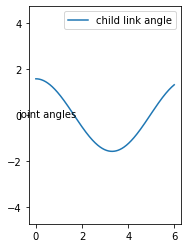

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

def plot_xy(tspan, dt, x,y, footnote):
  """A helper function to plot our data sets 
  
  PARAMETERS
  ----------
  x      A 1d numpy array of x
  y      A 1d numpy array of y
  footnote  A python string for footnote
  """
  # plot the data
  tvec = np.arange(start = min(tspan), stop = max(tspan),step=dt)
  plt.plot(tvec, x, label='x')
  plt.plot(tvec, y, label='y')
  ax = plt.gca()
  ax.text(0.5, -0.1, footnote, ha="center") #foot note 
  plt.legend()
  plt.axis('equal')
# ```
#  - Make plots side by side
#  ```
#   fig=plt.figure(figsize=(20,5), dpi= 100, facecolor='w', edgecolor='k') 
#   plt.subplot(1,2,2) 

def plot_angles(tspan, dt, theta_c, theta_p, footnote):
  """A helper function to plot our data sets 
  
  PARAMETERS
  ----------
  x      A 1d numpy array of x
  y      A 1d numpy array of y
  footnote  A python string for footnote
  """
  # plot the data
  tvec = np.arange(start = min(tspan), stop = max(tspan),step=dt)
  if theta_c is not None:
    plt.plot(tvec, theta_c, label='child link angle')
  if theta_p is not None:
    plt.plot(tvec, theta_p, label='parentlink angle')
  ax = plt.gca()
  ax.text(0.5, -0.1, footnote, ha="center") #foot note 
  plt.legend()
  plt.axis('equal')



# fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k') 
# plt.subplot(1,2,1) 
# plot_xy(tspan=tspan, dt=dt, x=xvec[0], y=xvec[1], footnote="base link position")

plt.subplot(1,2,1) 
plot_angles(tspan=tspan, dt=dt, theta_c=xvec[0], theta_p=None, footnote="joint angles")


